In [1]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)//create  and 
#import data and also create a matrix of features with dependent variable
from math import sqrt #inbuilt funtion

import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns   #library for data visualisation based on matplotlib
import IPython #command shell for interactive computing

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam #used to optimise the dataset in the neural network algorithm.

from keras.wrappers.scikit_learn import KerasClassifier # kerasClasiifier is the function
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

print('Imported successfully')

Imported successfully


In [2]:
#Loading data in a dataframe 'creditcard_data' and using head() to display the first 5 instances.
creditcard_data= pd.read_csv("creditcard.csv")
creditcard_data.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
creditcard_data.shape

(284807, 31)

In [4]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
creditcard_data['Class'].nunique()

2

In [6]:
#number of instances per class
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

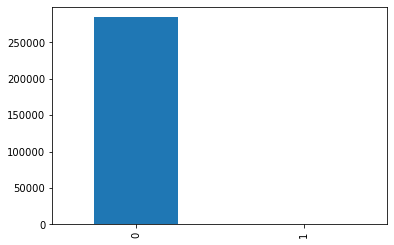

In [7]:
creditcard_data.Class.value_counts().plot.bar()

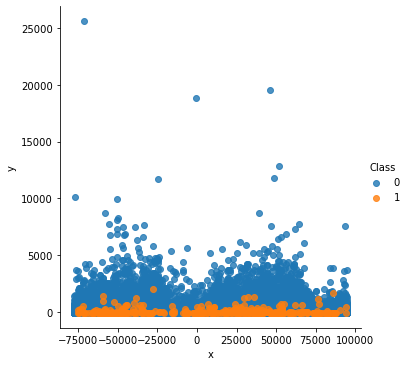

In [8]:
#Before sampling (PCA is performed for visualization only)
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(creditcard_data.iloc[:,0:30]))#locates rows,columns
creditcard_2d= pd.concat([creditcard_2d, creditcard_data['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class',)

In [9]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
(creditcard_data.Class.value_counts())/(creditcard_data.Class.count())
#checking the percentage of each class in the dataset

0    0.998273
1    0.001727
Name: Class, dtype: float64

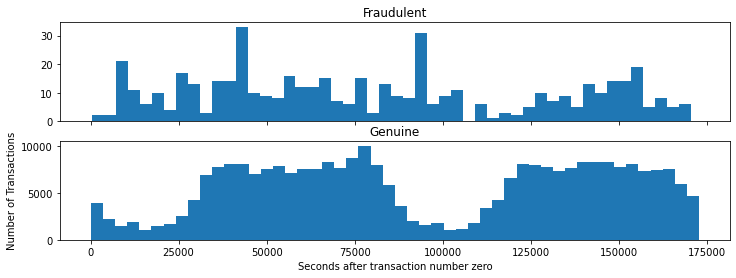

In [11]:
# Histogram for feature Time
# Plotting all the class value separatly with their datas
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
creditcard_data.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

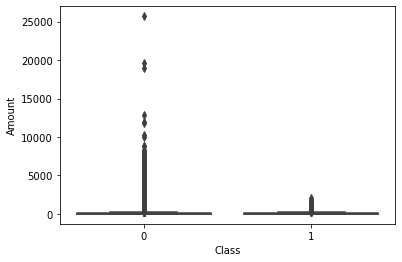

In [12]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=creditcard_data['Class'], y=creditcard_data['Amount'])

In [13]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
creditcard_data['Std_Amount'] = Rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579


In [14]:
#drop Amount and move Std_Amount at index '0'
creditcard_data = creditcard_data.drop('Amount',axis=1)

Std_Amount = creditcard_data['Std_Amount']
creditcard_data.drop('Std_Amount', axis=1, inplace=True)
creditcard_data.insert(0, 'Std_Amount', Std_Amount)
creditcard_data.head()

,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [15]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = creditcard_data.drop('Class', axis=1)
Y = creditcard_data['Class']

sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)#default splitting value=5

for train_index1, test_index in sss1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

In [16]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)#removes the redundant value
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99807471 0.00192529]
[0.99827955 0.00172045]
[0.99845511 0.00154489]


In [17]:
#Dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(170883, 30)
(170883,)
(56962, 30)
(56962,)
(56962, 30)
(56962,)


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

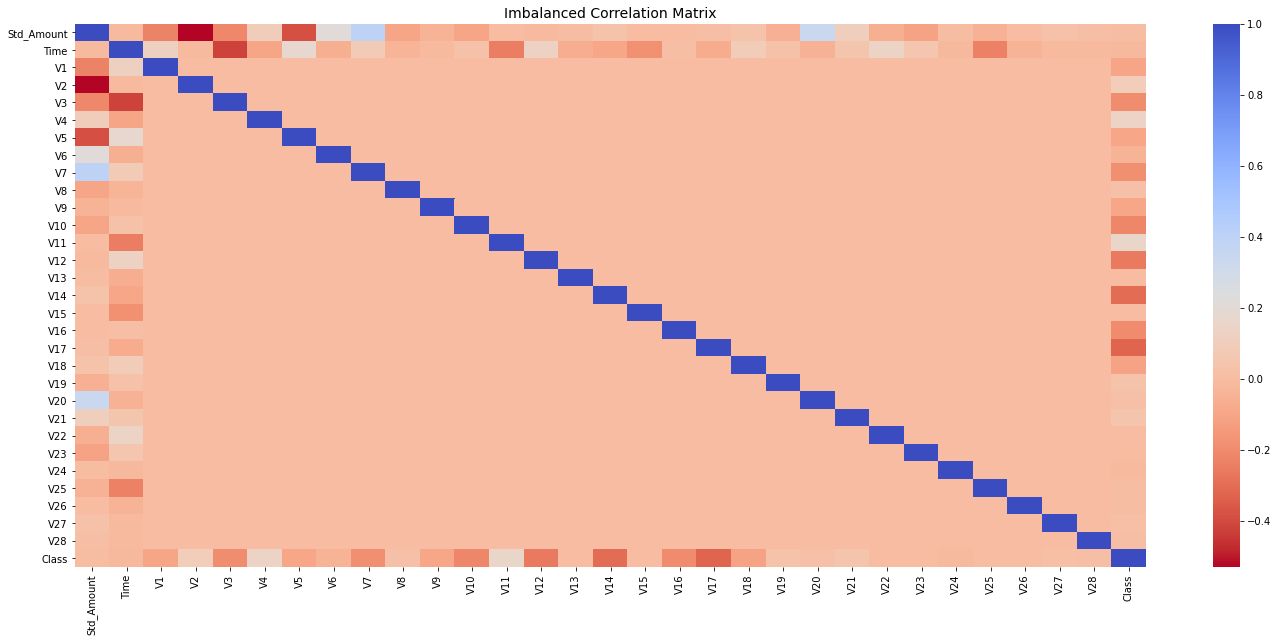

In [18]:
#checking correlation between features and the likelihood of the transaction to be fraud on the unbalanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

## Balancing the class starts here since the correlation matrix is affected by the high imbalance betwen the classes

In [19]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 170602, 0: 170554})
Shape of X_adasampled: (341156, 30)
Shape of Y_adasampled: (341156,)


In [20]:
#check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49992965 0.50007035]


In [21]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount      Time        V1        V2        V3        V4        V5  \
0   -0.286173   25183.0 -0.313555  0.586734  3.039981  2.848687 -0.158865   
1    0.237546   97469.0  1.883183 -0.640580  0.094691  0.386752 -0.859323   
2    1.170265  144962.0 -5.593796 -3.140554 -0.055757  1.539374  1.321195   
3   -0.267729  140847.0 -0.851124  0.819195  2.014788 -0.634556 -0.166583   
4    1.369384   58534.0 -1.339343  0.842304  2.210153  3.009876 -0.501056   

         V6        V7        V8  ...       V19       V20       V21       V22  \
0  0.838171 -0.305911  0.136755  ...  0.211776  0.064667 -0.064730  0.538368   
1  0.238667 -1.172713  0.238254  ... -0.228614 -0.191241 -0.063316  0.025427   
2  1.449076  0.494910 -0.187489  ...  0.313058 -3.165442 -0.732926  1.617461   
3  0.779931 -0.248282  0.440142  ...  0.608179  0.309633  0.133497  0.615617   
4  1.506612  0.044767  0.574622  ...  1.033634  0.245178 -0.188658 -0.159114   

        V23       V24       V25       V26       V27     

In [22]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.286173,25183.0,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
1,0.237546,97469.0,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
2,1.170265,144962.0,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
3,-0.267729,140847.0,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
4,1.369384,58534.0,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


Text(0.5, 1.0, 'Balanced Correlation Matrix')

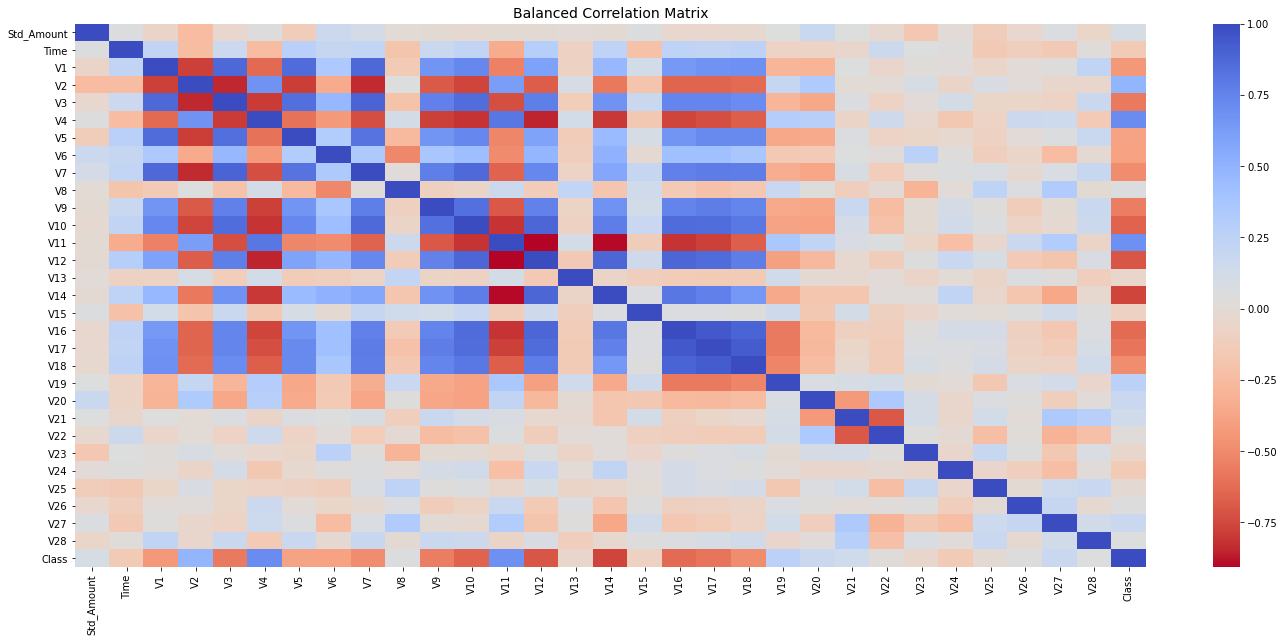

In [23]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

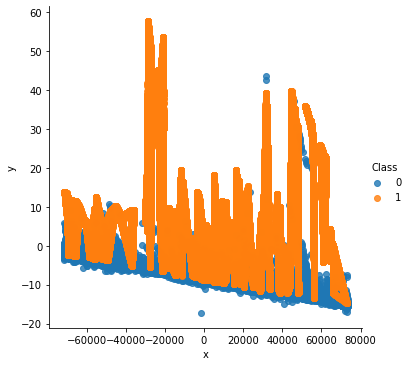

In [24]:
#visualizing balanced train dataset
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

In [25]:
#An undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
14162,-0.286173,25183.0,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
152802,0.237546,97469.0,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
227171,1.170265,144962.0,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
217316,-0.267729,140847.0,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
80544,1.369384,58534.0,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


In [26]:
Train_set.shape

(170883, 31)

In [27]:
length_frauds=len(Train_set[Train_set.Class==1]) #length of fraud
length_frauds

329

In [28]:
#Taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
143188,-0.279466,85181.0,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,...,0.692537,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,1
86155,1.110878,61108.0,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1
9487,-0.293440,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
163586,0.600852,116067.0,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,...,0.424608,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,1
223578,-0.183050,143438.0,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,...,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,1


In [29]:
#Taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
#Randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(329, 31)

In [30]:
#Appending both Frauds and Non-Frauds
undersampled_df= fraud_df.append(non_frauds)
#Randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()

,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
218341,0.530986,141275.0,-1.264154,0.426594,0.497832,-0.170862,1.157415,-0.365270,0.833738,0.019839,...,0.099974,-0.203993,-0.443964,0.014066,0.647392,0.703757,0.122222,-0.050474,0.094505,0
123270,-0.293440,76867.0,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,...,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,1
193445,2.164466,130138.0,-1.751949,0.218465,-0.861918,-0.435150,0.429523,-0.728059,1.217877,0.144056,...,-0.596200,0.254156,0.953942,0.178601,-0.473259,0.183801,-0.141318,-0.038427,0.033587,0
112840,0.321805,72824.0,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,...,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,1
139382,0.385524,83126.0,-1.189721,0.869849,2.342483,3.155366,-0.656843,0.978601,-0.554871,0.825237,...,0.370836,0.165544,0.630473,-0.297924,-0.057551,0.444471,0.565400,0.247714,0.045279,0


In [31]:
#Separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(658, 30)
(658,)


,Std_Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
218341,0.530986,141275.0,-1.264154,0.426594,0.497832,-0.170862,1.157415,-0.365270,0.833738,0.019839,...,1.315487,0.099974,-0.203993,-0.443964,0.014066,0.647392,0.703757,0.122222,-0.050474,0.094505
123270,-0.293440,76867.0,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,...,-0.880812,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337
193445,2.164466,130138.0,-1.751949,0.218465,-0.861918,-0.435150,0.429523,-0.728059,1.217877,0.144056,...,-0.151479,-0.596200,0.254156,0.953942,0.178601,-0.473259,0.183801,-0.141318,-0.038427,0.033587
112840,0.321805,72824.0,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,...,0.407188,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335
139382,0.385524,83126.0,-1.189721,0.869849,2.342483,3.155366,-0.656843,0.978601,-0.554871,0.825237,...,1.284419,0.370836,0.165544,0.630473,-0.297924,-0.057551,0.444471,0.565400,0.247714,0.045279


In [32]:
#Converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [33]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

## EXPERIMENTAL DESIGN

1. Multi-layer Perceptron with 1 hidden layer

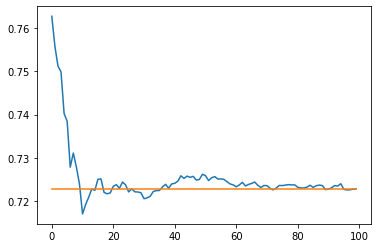

In [34]:
#Plotting number of repeats against the average score from those repeats.
#Expected: As the number of repeats increase, the average score stabilizes
f_score_list=[0.7627118644067796, 0.749003984063745, 0.7419354838709676, 0.7457627118644068, 0.7018867924528301, 0.7294117647058823, 0.6643109540636042, 0.753968253968254, 0.7018867924528301, 0.6888888888888889, 0.6478873239436619, 0.7430830039525692, 0.7410358565737051, 0.7479674796747967, 0.7175572519083968, 0.7634854771784232, 0.7265625, 0.6690647482014389, 0.7159533073929961, 0.7258064516129031, 0.7540983606557377, 0.7315175097276265, 0.7045454545454546, 0.7580645161290323, 0.7076923076923076, 0.6816479400749064, 0.7407407407407407, 0.7041198501872659, 0.7209302325581397, 0.7171314741035857, 0.6789667896678966, 0.7272727272727273, 0.732283464566929, 0.7583333333333334, 0.73015873015873, 0.7230769230769232, 0.7531380753138075, 0.7459016393442623, 0.6893939393939396, 0.7622950819672131, 0.7295081967213115, 0.7450980392156862, 0.7782426778242677, 0.6992481203007519, 0.748971193415638, 0.7126436781609196, 0.7364341085271319, 0.6842105263157894, 0.7317073170731707, 0.7848101265822784, 0.7104247104247104, 0.6666666666666666, 0.7591836734693878, 0.7401574803149606, 0.6946564885496183, 0.7272727272727273, 0.7175572519083968, 0.6946564885496183, 0.6940298507462687, 0.7109375, 0.6966292134831462, 0.7510204081632654, 0.7603305785123966, 0.6713780918727914, 0.7460317460317459, 0.7398373983739839, 0.7449392712550608, 0.673913043478261, 0.6881720430107526, 0.7551867219917012, 0.7215686274509804, 0.6789667896678966, 0.6966292134831462, 0.7551867219917012, 0.7666666666666667, 0.7215686274509804, 0.732283464566929, 0.732283464566929, 0.7181467181467182, 0.7250996015936256, 0.6791044776119403, 0.7109375, 0.7203065134099617, 0.7410358565737051, 0.7603305785123966, 0.681159420289855, 0.7551867219917012, 0.7368421052631579, 0.7142857142857143, 0.6416382252559727, 0.7294117647058823, 0.7531380753138075, 0.7698744769874477, 0.7131782945736435, 0.775, 0.5987261146496816, 0.7099236641221374, 0.7265625, 0.7372549019607844, 0.7280000000000001]
f_df=pd.DataFrame(f_score_list)
fscores= f_df.values
final_mean= np.mean(fscores[0:101])
means = list()
for i in range(1,len(f_score_list)+1):
    data = fscores[0:i, 0]
    mean_fscore = np.mean(data)
    means.append(mean_fscore)
# line plot of the values generated in the list
plt.plot(means)
plt.plot([final_mean for x in range(len(means))])
plt.show() #From this plot the point of diminishing returns can be located.

## IMPLEMENTATION

In [35]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [36]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                2015      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 66        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
488/488 - 28s - loss: 296.6738 - accuracy: 0.6129 - val_loss: 2.0113 - val_accuracy: 0.9371
Epoch 2/30
488/488 - 1s - loss: 38.2817 - accuracy: 0.7819 - val_loss: 118.3269 - val_accuracy: 0.0590
Epoch 3/30
488/488 - 1s - loss: 29.0615 - accuracy: 0.8214 - val_loss: 1.1354 - val_accuracy: 0.9844
Epoch 4/30
488/488 - 1s - loss: 41.2375 - accuracy: 0.8128 - val_loss: 5.1217 - val_accuracy: 0.9158
Epoch 5/30
488/488 - 1s - loss: 30.8420 - accuracy: 0.8534 - val_loss: 1.4923 - val_accuracy: 0.9843
dict_ke

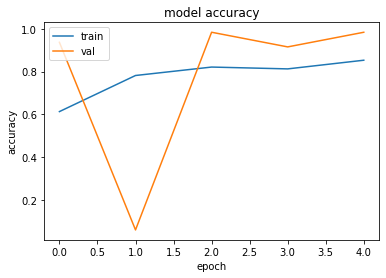

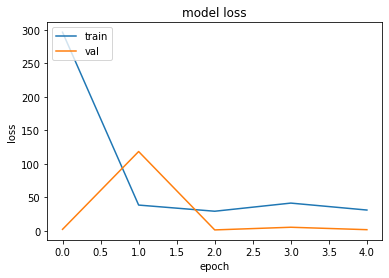

In [37]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 65)                2015      
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 66        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
488/488 - 4s - loss: 3069.7834 - accuracy: 0.5101 - val_loss: 0.2365 - val_accuracy: 0.9974
Epoch 2/40
488/488 - 2s - loss: 22.3672 - accuracy: 0.5398 - val_loss: 0.0387 - val_accuracy: 0.9939
Epoch 3/40
488/488 - 2s - loss: 15.3606 - accuracy: 0.5401 - val_loss: 0.0669 - val_accuracy: 0.9960
Epoch 4/40
488/488 - 2s - loss: 9.0338 - accuracy: 0.5780 - val_loss: 33.3343

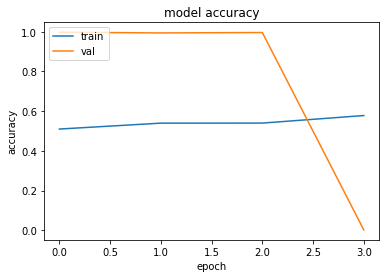

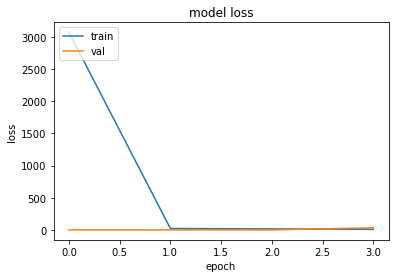

In [39]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0482 - accuracy: 0.9940: 0s - loss: 0.0485 - accuracy: 
Accuracy Model1 (Dropout): 0.9940486550331116
Recall_score: 0.09183673469387756
Precision_score: 0.03474903474903475
F-score: 0.05042016806722689


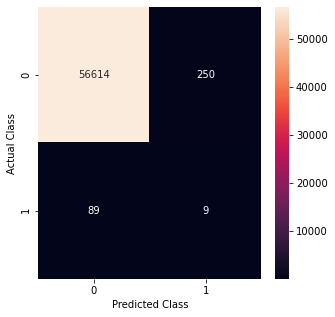

In [40]:
Y_pred_cls = Model1_drop.predict_classes(Xtest_arr, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))
conf_matrix(Y_pred_cls)

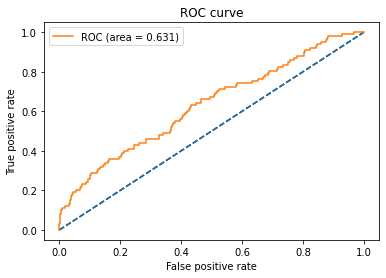

In [41]:
#Plotting ROC curve
Y_pred_prob = Model1_drop.predict_proba(Xtest_arr).ravel()

fpr_model1, tpr_model1, thresholds_model1 = roc_curve(Ytest_arr, Y_pred_prob, pos_label=1)
auc_model1 = roc_auc_score(Ytest_arr, Y_pred_prob)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC (area = {:.3f})'.format(auc_model1))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

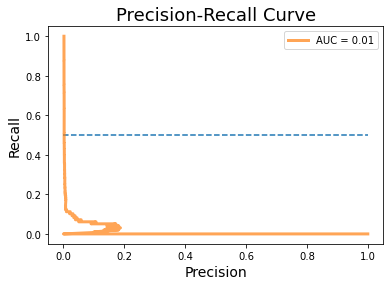

In [42]:
#Calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [43]:
#Training Multi-layer Perceptron with single hidden layer for 60 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred = First_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

[0.1863354037267081, 0.07782101167315175, 0.0, 0.003436365867770044, 0.06646525679758308, 0.16759776536312848, 0.11698537682789649, 0.012396694214876033, 0.00522875816993464, 0.012987012987012986, 0.13149847094801223, 0.0, 0.11387900355871886, 0.0, 0.005099439061703212, 0.09691629955947136, 0.0, 0.10891089108910891, 0.06866952789699571, 0.0, 0.128, 0.0034417967583893795, 0.09036144578313253, 0.0, 0.08668730650154799, 0.0, 0.06039076376554174, 0.04329004329004328, 0.0034375712506796215, 0.12631578947368421, 0.06276150627615062, 0.0, 0.19424460431654675, 0.0, 0.1051502145922747, 0.0625, 0.04494382022471909, 0.08443271767810025, 0.08118081180811809, 0.10199556541019955, 0.0827250608272506, 0.09165302782324058, 0.01951219512195122, 0.05625000000000001, 0.11846689895470382, 0.10493343774471417, 0.035175879396984924, 0.0, 0.05945945945945946, 0.047619047619047616, 0.12030075187969924, 0.055900621118012424, 0.25000000000000006, 0.10526315789473684, 0.12987012987012986, 0.13061224489795917, 0.

In [44]:
#Training Multi-layer perceptron with 2 hidden layers
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
488/488 - 5s - loss: 1173.2773 - accuracy: 0.4999 - val_loss: 1.1152 - val_accuracy: 0.0015
Epoch 2/40
488/488 - 3s - loss: 11.6953 - accuracy: 0.5014 - val_loss: 0.4644 - val_accuracy: 0.9307
Epoch 3/40
488/488 - 3s - loss: 5.0887 - accuracy: 0.5072 - val_loss: 1.2350 - val_accuracy: 0.0015
Epoch 4/40
488/488 - 3s - loss: 2.9305 - accuracy: 0.5116 - val_loss: 1.0020 - val_accuracy: 0.0015
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


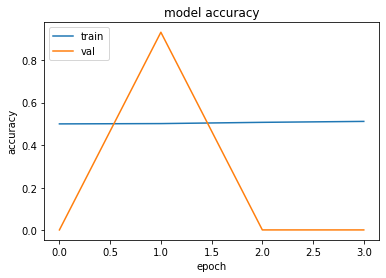

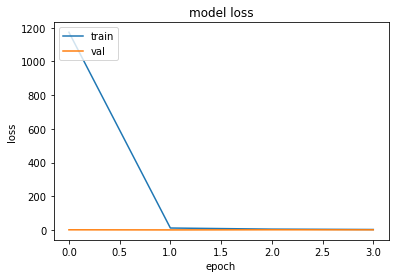

In [45]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1781/1781 [==============================] - 3s 1ms/step - loss: 0.4131 - accuracy: 0.9439
Accuracy MLP: 0.943927526473999
1781/1781 [==============================] - 3s 2ms/step - loss: 0.4131 - accuracy: 0.9439
Loss value: 0.41309019923210144
Recall_score: 0.12244897959183673
Precision_score: 0.0038461538461538464
F-score: 0.0074580484773151025


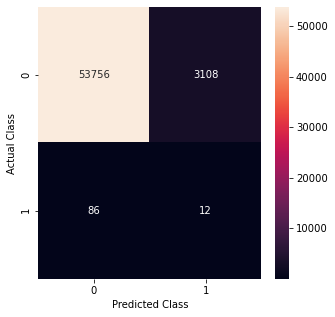

In [46]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))

Y_mod2_pred = Model2.predict_classes(Xtest_arr, batch_size=200, verbose=0)
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_mod2_pred)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_mod2_pred)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_mod2_pred)))
conf_matrix(Y_mod2_pred)

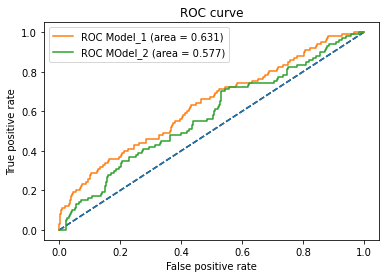

In [47]:
Y_pred_prob2 = Model2.predict_proba(Xtest_arr).ravel()

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(Ytest_arr, Y_pred_prob2, pos_label=1)
auc_model2 = roc_auc_score(Ytest_arr, Y_pred_prob2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC Model_1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

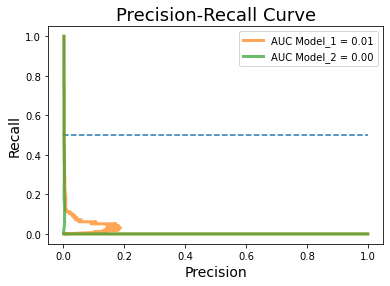

In [48]:
#Calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

#Auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [49]:
#Iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    
    Second_Model = Sequential()
    Second_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred = Second_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_second_pred)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)

[0.0, 0.00727537286285922, 0.006844626967830252, 0.0035837407241493483, 0.0, 0.0, 0.0071174377224199285, 0.0079734219269103, 0.0, 0.007677543186180423, 0.0014749262536873158, 0.0, 0.007207207207207208, 0.0, 0.003435101125170879, 0.0034350409225538483, 0.0034350409225538483, 0.006521739130434781, 0.0, 0.0, 0.0014858841010401186, 0.007079646017699115, 0.0034349807220469685, 0.0, 0.004094097117352932, 0.003435101125170879, 0.005698005698005698, 0.0, 0.0048963133640553, 0.007142857142857143, 0.0, 0.005326625730561515, 0.0, 0.007326007326007325, 0.006611570247933884, 0.0034349807220469685, 0.003578763293275585, 0.007349938750510413, 0.006560449859418931, 0.0, 0.0076238881829733185, 0.0066100094428706326, 0.004029333548231122, 0.007883326763894364, 0.007822685788787483, 0.007434944237918215, 0.006412997007268062, 0.0, 0.0, 0.0034349807220469685, 0.0, 0.00516795865633075, 0.0, 0.0, 0.0034349807220469685, 0.0, 0.007255139056831923, 0.003435101125170879, 0.007173601147776184, 0.0]
FScore Mean: 

In [50]:
#Comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.07175373587822323
----------------------------------------
Model-2
---------
Average F-Score: 0.00368592277620145


In [51]:
#Comparing the Standard Deviation for F-scores generated after iterations
fscore_df1=pd.DataFrame(f_scorelist1)

print('Model-1')
print('------------------')
print('F_score SD: ' + str(fscore_df1.std()))

print('-'*40)

fscore_df2=pd.DataFrame(f_scorelist2)

print('Model-2')
print('------------------')
print('F_score SD: ' + str(fscore_df2.std()))

Model-1
------------------
F_score SD: 0    0.058809
dtype: float64
----------------------------------------
Model-2
------------------
F_score SD: 0    0.003065
dtype: float64


<AxesSubplot:>

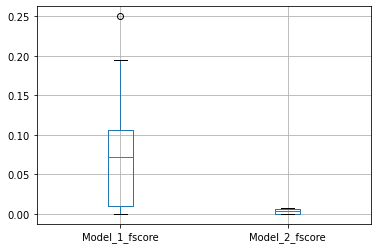

In [52]:
#Visualize the results using a boxplot()

results_fscore= pd.concat([fscore_df1, fscore_df2], axis=1)
results_fscore.columns = ['Model_1_fscore', 'Model_2_fscore']

results_fscore.boxplot()

In [54]:
#Testing the Null Hypothesis that a sample comes from a Normal Distribution
alpha = 0.05;

s, p = stats.normaltest(fscore_df1)
if p < alpha:
  print('Model-1 Data is not normal')
else:
  print('Model-1 Data is normal')

s, p = stats.normaltest(fscore_df2)
if p < alpha:
  print('Model-2 Data is not normal')
else:
  print('Model-2 Data is normal')

Model-1 Data is normal
Model-2 Data is not normal


In [55]:
#Wilcoxon Signed-Rank Test
#It tests the null hypothesis that two related paired samples come from the same distribution.
#It is a non-parametric version of the paired T-test.

s, p = stats.wilcoxon(fscore_df1[0], fscore_df2[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis rejected, significant difference between the data-sets
